In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

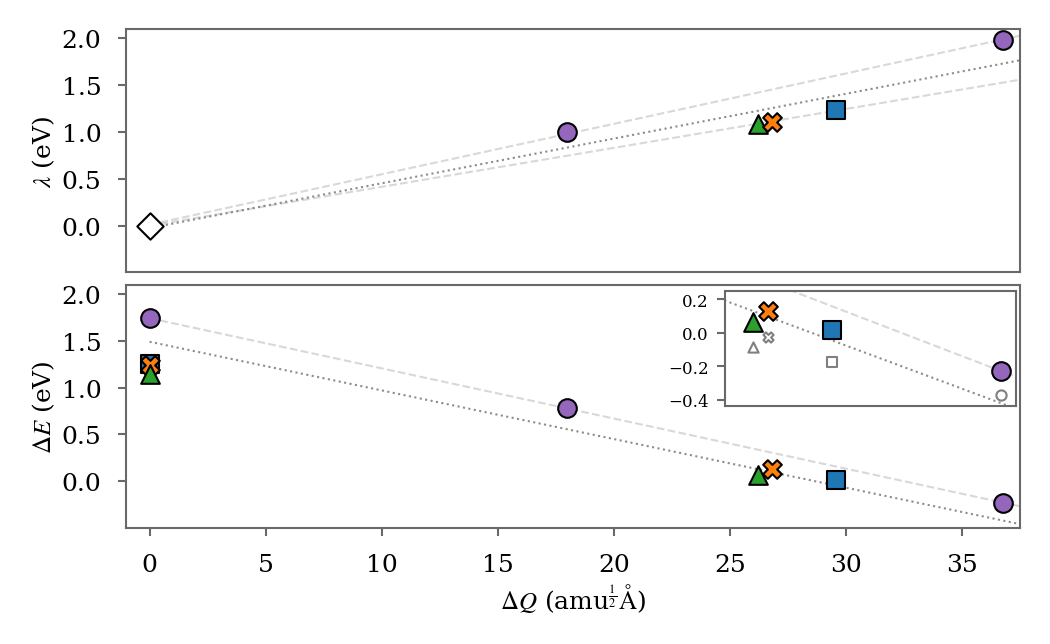

In [8]:
# set mpl variables
ticklabelsize = 6
ticksize = 2
linewidth = 0.5
labelsize = 8
tick_pad = 4
fontsize=6
markersize=20
labelpad=1.2

# fonts
matplotlib.rc('font', **{'family': 'serif'})
matplotlib.rc('text', usetex=False)
matplotlib.rc('pdf', fonttype=42)
matplotlib.rc('mathtext', fontset='stix')

# create figure
fig = plt.figure(figsize=(3.6, 3.6/1.6), facecolor="w", dpi=300)

#make gridspec
gs = gridspec.GridSpec(2, 1,height_ratios=[1,1]) 

# make subplots and inset for plotting E-Q data
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
axin = ax2.inset_axes([0.67, 0.5, 0.325, 0.475])

# data from DFT calculations
# They are listed in order: MAPbI (cubic), MACsPbI (2:14), MACsPbI (4:12), MACsPbI (8:8), literature values 
# delta Q scaled by the cell size
Q_full_adj = [36.76,25.94*np.sqrt((4001.3/3922.9)),26.30*np.sqrt((4001.3/3845.29)),28.96*np.sqrt((4001.3/3837.00)),18] 
CTL = [-0.23,0.063,0.13,0.015,0.78]  # charge transition levels (delta E)
E_relax = [1.98,1.09,1.104,1.24,1]  # relaxation energies
CTL_pbesol = [-0.375,-0.088,-0.026,-0.173]

# scatter point formatting
markers=["o","^","X","s","o","o"]
colors=["tab:purple","tab:green","tab:orange","tab:blue","tab:purple","tab:purple"]

# place scatter points
for i in range(len(Q_full_adj)):
    ax1.scatter(Q_full_adj[i],E_relax[i],color=colors[i],marker=markers[i],s=markersize,edgecolor='black',linewidth=0.5)
for i in range(len(Q_full_adj)):
    ax2.scatter(Q_full_adj[i],CTL[i],color=colors[i],marker=markers[i],s=markersize,edgecolor='black',linewidth=0.5)
for i in range(4):
    axin.scatter(Q_full_adj[i],CTL_pbesol[i],color="white",marker=markers[i],s=markersize-14,edgecolor='gray',linewidth=0.5,zorder=0)
for i in range(4):
    axin.scatter(Q_full_adj[i],CTL[i],color=colors[i],marker=markers[i],s=markersize,edgecolor='black',linewidth=0.5)  
    
# place an additional point at 0,0 (by definition when delta Q=0, the relaxation energy is 0)
ax1.scatter(0,0,color='white',marker="D",s=markersize,edgecolor='black',linewidth=0.5)

# place additional points for the vertical transition levels
ax2.scatter(0,1.74,color='tab:purple',marker="o",s=markersize,edgecolor='black',linewidth=0.5)
ax2.scatter(0,1.24,color='tab:orange',marker="X",s=markersize,edgecolor='black',linewidth=0.5,zorder=1)
ax2.scatter(0,1.25,color='tab:blue',marker="s",s=markersize,edgecolor='black',linewidth=0.5,zorder=0)
ax2.scatter(0,1.15,color='tab:green',marker="^",s=markersize,edgecolor='black',linewidth=0.5)

# first order polynomial fits to a subset of the data (either single cation or mixed cation)
ax1.plot(np.linspace(0,40,100),np.polyval(np.polyfit([0,25.94*np.sqrt((4001.3/3922.9)),26.30*np.sqrt((4001.3/3845.29)),28.96*np.sqrt((4001.3/3837.00))],[0,1.088,1.104,1.24],1),np.linspace(0,40,100)),
            color='gray', markeredgecolor='gray', lw=linewidth,linestyle="dashed",zorder=0,alpha=0.3)

ax1.plot(np.linspace(0,40,100),np.polyval(np.polyfit([0,18,36.76],[0,1,1.98],1),np.linspace(0,40,100)),
            color='gray', markeredgecolor='gray', lw=linewidth,linestyle="dashed",zorder=0,alpha=0.3)

ax1.plot(np.linspace(0,40,100),np.polyval(np.polyfit([0,18,36.76,25.94*np.sqrt((4001.3/3922.9)),26.30*np.sqrt((4001.3/3845.29)),28.96*np.sqrt((4001.3/3837.00))],[0,1,1.98,1.088,1.104,1.24],1),np.linspace(0,40,100)),
            color='gray', markeredgecolor='gray', lw=linewidth,linestyle="dotted",zorder=0,alpha=0.9)

ax2.plot(np.linspace(0,40,100),np.polyval(np.polyfit([36.76,18,0],[-0.23,0.78,1.74],1),np.linspace(0,40,100)),
            color='gray', markeredgecolor='gray', lw=linewidth,linestyle="dashed",zorder=0,alpha=0.3)

ax2.plot(np.linspace(0,40,100),np.polyval(np.polyfit([25.05*np.sqrt((4001.3/3922.9)),23.16*np.sqrt((4001.3/3845.29)),26.55*np.sqrt((4001.3/3837.00)),0,35.16,18,0],[0.06,0.13,0.015,1.22,-0.23,0.78,1.74],1),np.linspace(0,40,100)),
            color='gray', markeredgecolor='gray', lw=linewidth,linestyle="dotted",zorder=0,alpha=0.9)

axin.plot(np.linspace(0,40,100),np.polyval(np.polyfit([25.05*np.sqrt((4001.3/3922.9)),23.16*np.sqrt((4001.3/3845.29)),26.55*np.sqrt((4001.3/3837.00)),0,35.16,18,0],[0.06,0.13,0.015,1.22,-0.23,0.78,1.74],1),np.linspace(0,40,100)),
            color='gray', markeredgecolor='gray', lw=linewidth,linestyle="dotted",zorder=0,alpha=0.9)

axin.plot(np.linspace(0,40,100),np.polyval(np.polyfit([36.76,18,0],[-0.23,0.78,1.74],1),np.linspace(0,40,100)),
            color='gray', markeredgecolor='gray', lw=linewidth,linestyle="dashed",zorder=0,alpha=0.3)

# axis formatting
ax1.set_xticks([])
ax1.tick_params(labelsize=ticklabelsize,size=ticksize, width=linewidth, pad=tick_pad, color='dimgray')
ax1.set_ylabel(r"$\lambda$ (eV)",fontsize=fontsize,labelpad = labelpad)
ax1.set_xlim([-1,37.5])
ax1.set_ylim([-0.5,2.1])
ax1.set_yticks([0,0.5,1,1.5,2.0])

ax2.tick_params(labelsize=ticklabelsize,size=ticksize, width=linewidth, pad=tick_pad, color='dimgray')
ax2.set_xlabel(r"$\Delta Q$ (amu$^\frac{1}{2} \mathrm{\AA}$)",fontsize=fontsize,labelpad = labelpad)
ax2.set_ylabel(r"$\Delta E$ (eV)",fontsize=fontsize,labelpad = labelpad)
ax2.set_yticks([0,0.5,1,1.5,2.0])
ax2.set_ylim([-0.5,2.1])
ax2.set_xlim([-1,37.5])

axin.tick_params(labelsize=ticklabelsize-2,size=ticksize, width=linewidth, pad=tick_pad-2, color='dimgray')
axin.set_ylim([-0.44,0.25])
axin.set_xlim([25,37.4])
axin.set_xticks([])
axin.set_yticks([-0.4,-0.2,0,0.2])

for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(linewidth)
    ax1.spines[axis].set_color("dimgray")
    ax2.spines[axis].set_linewidth(linewidth)
    ax2.spines[axis].set_color("dimgray")
    axin.spines[axis].set_linewidth(linewidth)
    axin.spines[axis].set_color("dimgray")

plt.tight_layout()
fig.subplots_adjust(hspace=0.05)